# <center>AUTO-ML-TEAM-12<center>
---

In [77]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# import XGBoostRegressor as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings(action='ignore')

### Load the data

In [78]:
# read in data
dataset = pd.read_csv('housing_price_dataset.csv')

### Preview data

In [79]:
dataset.info()
display(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065

### General Stats

In [80]:
dataset.describe()

SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052
max     2999.000000      5.000000      3.000000   2021.000000  492195.259972

### Drop negative values in price columns

In [81]:
dataset = dataset[dataset['Price'] > 0]

### Box plots of dataset columns

In [94]:
plt.figure(figsize=(20,20))
for i, col in enumerate(dataset.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(dataset[col])
    plt.title(col)
plt.show()

### Correlations between variables

In [82]:
numerical_cols=dataset.select_dtypes(include=np.number).columns.tolist()
corr = dataset[numerical_cols].corr()
corr

SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.002568  -0.003381   0.000468  0.750656
Bedrooms     -0.002568  1.000000   0.007518   0.003167  0.072918
Bathrooms    -0.003381  0.007518   1.000000   0.003815  0.028322
YearBuilt     0.000468  0.003167   0.003815   1.000000 -0.002289
Price         0.750656  0.072918   0.028322  -0.002289  1.000000

### Performing one hot encoding for Neighborhood column

In [83]:
dataset = pd.get_dummies(dataset, columns=['Neighborhood']).astype(int)
display(dataset.head())

SquareFeet  Bedrooms  Bathrooms  YearBuilt   Price  Neighborhood_Rural  \
0        2126         4          1       1969  215355                   1   
1        2459         3          2       1980  195014                   1   
2        1860         2          1       1970  306891                   0   
3        2294         2          1       1996  206786                   0   
4        2130         5          2       2001  272436                   0   

   Neighborhood_Suburb  Neighborhood_Urban  
0                    0                   0  
1                    0                   0  
2                    1                   0  
3                    0                   1  
4                    1                   0

### Train-Test Split (80-10-10)

In [84]:
X= dataset.drop(['Price'], axis=1) # drop target variable)
y = dataset[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train model

In [85]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [86]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

rmse=np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2444275753.990559
Root Mean Squared Error: 49439.61725165921
R-squared: 0.5779865977575956


In [87]:
plt.scatter(y_test, y_pred, color='black')
plt.show() # points should make a line if the model is good

---
## Random Forest

### Train model

In [88]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [89]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2750632805.833639
Root Mean Squared Error: 52446.475628335975
R-squared: 0.5250929004985301


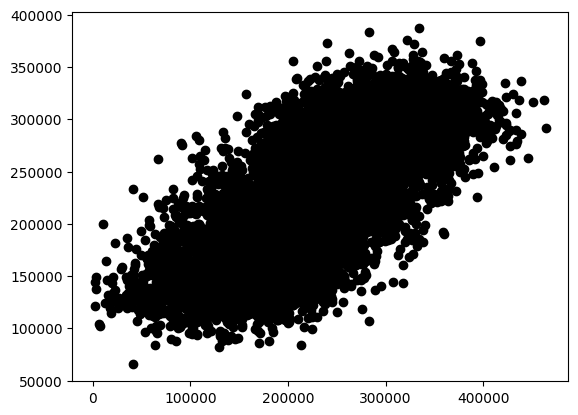

In [90]:
plt.scatter(y_test, y_pred, color='black')
plt.show() # points should make a line if the model is good

---
## Neural Network

### Train model

In [91]:
# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Train the model with early 
stoppinghistory = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping], validation_split=0.2)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 54752595968.0000 - mae: 221584.0156 - val_loss: 50214146048.0000 - val_mae: 211981.1719
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 39195836416.0000 - mae: 185709.4688 - val_loss: 25727008768.0000 - val_mae: 149492.1406
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 14251654144.0000 - mae: 105077.5625 - val_loss: 5952595456.0000 - val_mae: 64203.3281
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 3612081664.0000 - mae: 48149.9023 - val_loss: 2711986176.0000 - val_mae: 41581.0820
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2582023680.0000 - mae: 40593.1406 - val_loss: 2570434048.0000 - val_mae: 40451.6602
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 2524564480.0000 - mae: 40181.1523 - val_loss: 2547623424.0000 - val_mae: 40264.0078
Epoch 7/100
1000/1000 [=

### Model Evaluation

In [92]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

313/313 [==============================] - 0s 1ms/step
Mean Squared Error: 2454741487.293977
Root Mean Squared Error: 49545.347786588165
R-squared: 0.5761796495394471


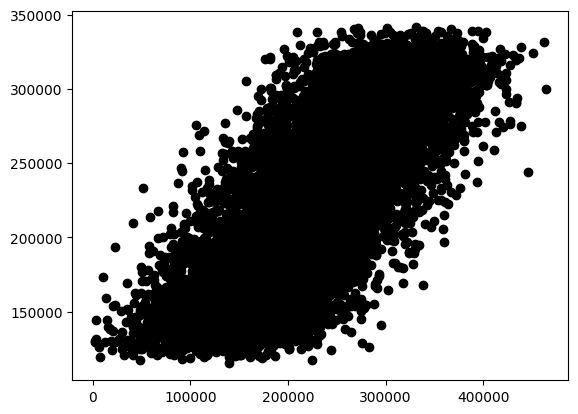

In [93]:
plt.scatter(y_test, y_pred, color='black')
plt.show() # points should make a line if the model is good